### Here are presented 5 examples of how apply Linear Fits to data, including the calculation of statistical errors
This methods are used for the students of the course of Introduction to Nuclear Physics in order to analyse data taken from the experiments
after a Gaussian Fit we know the elements we want to fit

### The data presented below were taken from the previous "gaussian_fit" analysis
### Getting the calibration curve knowing the gamma energies from Cobalt-60 and Cesium-137
$\gamma$(Cs-137) = 661.66 keV, $\gamma_{1}$(Co-60) = 1137.2 keV, $\gamma_{2}$(Co-60) = 1332.5 keV

Mean Channel: 1007.96, 1809.33, 2050.01
|Canal|Energy(keV)|
|----|----|
| 1007.96 | 661.66 |
| 1809.33 | 1137.2 |
| 2050.01 | 1332.5 |

______

## Content:
* 1. [numpy.polyfit method](#1-bullet)
* 2. [curve_fit  method from scipy.optimize package](#2-bullet)
* 3. [linregress mehods from scipy.stats](#3-bullet)
* 4. [LinearRegression from sklearn package](#4-bullet)
* 5. [OLS method from statsmodel](#5-bullet)

______

### 1. Linear Regresion using __numpy.polyfit__ function <a class="anchor" id="1-bullet"></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
channel = np.array([1007.96, 1809.33, 2050.01])
energy = np.array([661.66, 1137.2, 1332.5])

In [4]:
par, cov_matrix = np.polyfit(channel, energy, 1, cov=True)
error = np.sqrt(np.diag(cov_matrix))

print(f"Slope: {par[0]:.2f} +- {error[0]:.2f}")
print(f"Intercept: {par[1]:.2f} +- {error[1]:.2f}")

Slope: 0.63 +- 0.04
Intercept: 19.87 +- 68.62


El coeficiente de determinación $R^{2} = [Cor(Y,X)]^{2}$,     donde $Cor(Y,X)=\frac{Cov(Y,X)}{\sqrt(Cov(X,X)Cov(Y,Y))}$

In [5]:
def r_squared(x,y):
    return np.corrcoef(x,y)[1, 0]**2

#cor_matrix = np.corrcoef(channel, energy)
#print(cor_matrix[0,1].round(3))
print(f"R-squared: {r_squared(channel, energy):.4f}")

R-squared: 0.9958


In [6]:
from sklearn.metrics import r2_score 
R_square = r2_score(energy, channel * par[0] + par[1]) 
print('Coefficient of Determination:', R_square.round(4)) 

Coefficient of Determination: 0.9958


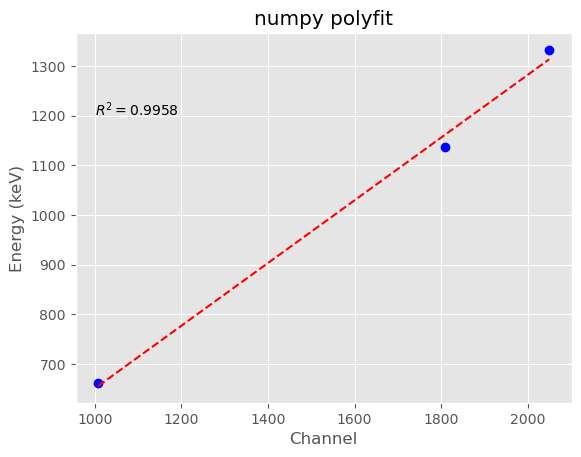

In [7]:
x = np.linspace(channel.min(),channel.max(),1000)
fig, ax = plt.subplots()
ax.plot(channel, energy, c = 'b', marker="o", ls="")
ax.plot(x, x * par[0] + par[1], c = 'r', ls="--")
ax.text(1000,1200,f"$R^{2}=${R_square.round(4)}")
plt.ylabel(r'Energy (keV)')
plt.xlabel(r'Channel')
plt.title(r"numpy polyfit")
plt.show()

### 2. Linear Regresion using __curve_fit__ from scipy.optimize <a class="anchor" id="2-bullet"></a>

In [8]:
from scipy.optimize import curve_fit

In [9]:
# user defined function
def model_f(x,m,n):
    return m * x + n

In [10]:
init_values = [1,1]
params, cov_m = curve_fit(model_f, channel, energy, p0 = init_values)

Reportando las incertidumbres y el coeficiente de determinación

In [11]:
err = np.sqrt(np.diag(cov_m))

print(f"Slope: {par[0]:.2f} +- {err[0]:.2f}")
print(f"Intercept: {par[1]:.2f} +- {err[1]:.2f}")

Slope: 0.63 +- 0.04
Intercept: 19.87 +- 68.62


El coeficiente de determinación $R^{2}$ se relaciona con los siguientes de términos de la siguente forma:  
$R^{2} =1 - \frac{SSE}{SST}$  
donde:  
* Sum of squared Residuals $SSE = (y_{i}-\^y)^2$
* Total sum of squared deviation $SST = (y_{i}-\=y)^2$


In [12]:
energy_fit = channel * par[0] + par[1]
sse = sum((energy - energy_fit) ** 2)
sst = sum((energy - np.average(energy)) ** 2)
#sst = len(energy) * np.var(energy)
r_squared = 1 - sse/sst
print("SSE: ", sse.round(2), "\nSST: ", sst.round(2))
print("R_squared: ",r_squared.round(4))

SSE:  990.26 
SST:  238102.23
R_squared:  0.9958


### 3. __linregress__  mehods from scipy.stats <a class="anchor" id="3-bullet"></a>

In [13]:
from scipy.stats import linregress
result = linregress(channel, energy)

print(f"Slope-> {result.slope:.2f} +- {result.stderr:.2f}")
print(f"Intercept-> {result.intercept:.2f} +- {result.intercept_stderr:.2f}")
print(f"R-squared-> {result.rvalue:.8f}")

Slope-> 0.63 +- 0.04
Intercept-> 19.87 +- 68.62
R-squared-> 0.99791835


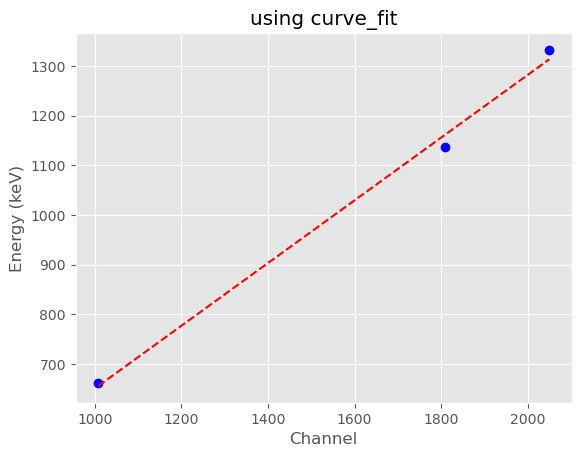

In [14]:
x = np.linspace(channel.min(),channel.max(),1000)

plt.plot(channel, energy,c='b', marker='o',ls="")
plt.plot(x, x * par[0] + par[1], 'r--')
plt.ylabel(r'Energy (keV)')
plt.xlabel(r'Channel')
plt.title(r"using curve_fit")
plt.show()

### 4. Linear Regresion using Machine learning (librería sklearn) <a class="anchor" id="4-bullet"></a>

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [16]:
# Model
model = LinearRegression()
type(model)
channel_train = channel.reshape(-1,1)
energy_train = energy.reshape(-1,1)
model.fit(channel_train, energy_train)

# Print parameters
print(f"intercepto (n): {model.intercept_}")
print(f"pendiente (m): {model.coef_}")
r_sq = r2_score(energy_train, channel_train * model.coef_ + model.intercept_)
print(f"R-squared (m): {r_sq:.4f}")

intercepto (n): [19.86944909]
pendiente (m): [[0.63109972]]
R-squared (m): 0.9958


### 5. Package __statmodels__ OLS(Ordinary Least Squares) <a class="anchor" id="5-bullet"></a>

Check library details here -> [statmodel package](https://www.statsmodels.org/stable/index.html)

** se necesitan al menos 8 coordenadas para que el modelo funcione correctamente

In [17]:
import statsmodels.api as sm  # for load inner datasets and artificail data
import statsmodels.formula.api as smf  # for datadrames

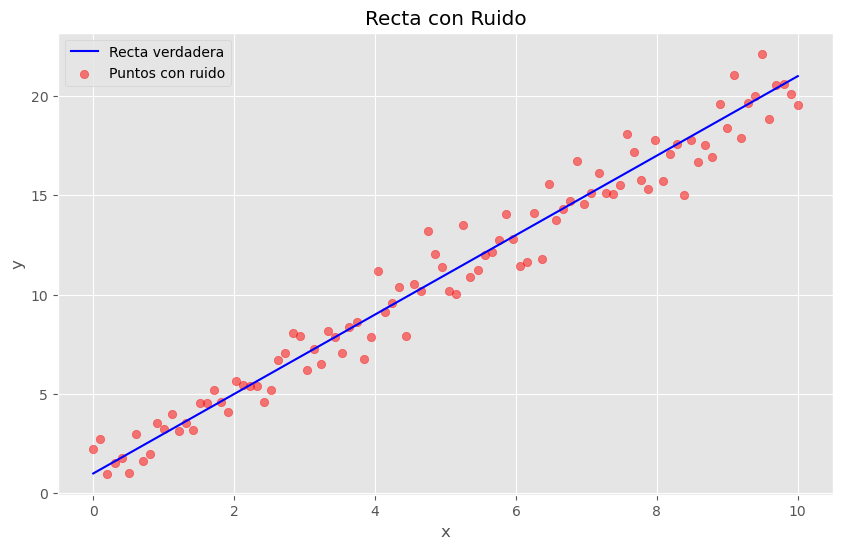

In [18]:
## Vamos a generar una recta genérica con algo de ruido
# Parámetros de la recta
m = 2  # Pendiente
b = 1  # Intersección con el eje y

# Generar valores de x
x = np.linspace(0, 10, 100)

# Generar valores de y sin ruido
y_true = m * x + b

# Agregar ruido aleatorio a los valores de y
ruido = np.random.normal(0, 1, size=y_true.shape)  # Ruido con media 0 y desviación estándar 1
y_noisy = y_true + ruido

# Graficar la recta y los puntos con ruido
plt.figure(figsize=(10, 6))
plt.plot(x, y_true, label='Recta verdadera', color='blue')
plt.scatter(x, y_noisy, label='Puntos con ruido', color='red', alpha=0.5)
plt.title('Recta con Ruido')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [19]:
# Aplicamos el método de ordinary least squares.
X_ = sm.add_constant(x) # agregar un imtercepto
model = sm.OLS(y_noisy, X_)
results = model.fit()
print(results.summary()) #results.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2971.
Date:                Mon, 16 Sep 2024   Prob (F-statistic):           4.19e-75
Time:                        11:39:52   Log-Likelihood:                -145.20
No. Observations:                 100   AIC:                             294.4
Df Residuals:                      98   BIC:                             299.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1862      0.207      5.723      0.0

### __Conclusions:__
#### There are presented different methods you can apply for analysis, each one has its advantages and disadvantages, feel free to hands on with them!!

### As a __Bibliography__ was used the standards libraries and the following books
+ Regression Analysis by Example, Wiley Series
+ Practical Statistics for Data Scientist, O'Reilly
+ Official online documentation from each package used 